In [99]:
from sklearn_genetic import GASearchCV
from genetic_selection import GeneticSelectionCV
from sklearn_genetic.space import Continuous, Categorical, Integer
from sklearn_genetic.plots import plot_fitness_evolution, plot_search_space
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
import numpy as np 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [59]:
f=pd.read_csv('Data_jan.csv',low_memory=False)

In [60]:
a=pd.get_dummies(f['是否离网']).astype(int)
b=a['Y'].replace(1,int(-1))+a['N']
b=b.to_frame('是否离网')

In [61]:
train_data_set=f.iloc[:,95:].join(b['是否离网'])
train_data_set=train_data_set.fillna(0)

In [84]:
ff=pd.read_csv('Data_feb.csv',low_memory=False)

In [85]:
aa=pd.get_dummies(ff['是否离网']).astype(int)
bb=aa['Y'].replace(1,int(-1))+aa['N']
bb=bb.to_frame('是否离网')
test_set=ff.iloc[:,95:].join(bb['是否离网'])
test_set=test_set.fillna(0)

In [65]:
clf = svm.SVC(kernel='linear')

In [27]:
len(train_data_set)-1000

91234

In [66]:
# train_data_set['target'] = train_data_set['是否离网']
X = train_data_set.drop(['是否离网'], axis=1)
y = train_data_set['是否离网'].astype(int)

In [67]:
clf.fit(X, y)

SVC(kernel='linear')

In [89]:
y_pred = clf.predict(test_set.drop(['是否离网'], axis=1))

In [95]:
clf.confusion_matrix

AttributeError: 'SVC' object has no attribute 'confusion_matrix'

In [92]:
y_pred

array([ 1,  1,  1, ...,  1, -1,  1])

In [90]:
val=y_pred-test_set['是否离网'].astype(int).to_numpy()

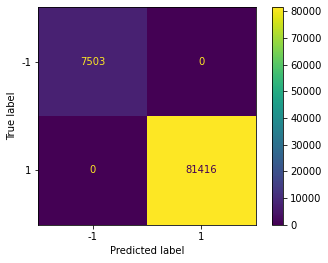

In [100]:
cm = confusion_matrix(test_set['是否离网'].astype(int).to_numpy(), y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()

In [102]:
margin = 1 / np.sqrt(np.sum(clf.coef_**2))
margin

10109831.339118209

In [79]:
len(clf.coef_[0])

173

In [55]:
len(ff.iloc[:,95:].columns.tolist())

173

In [80]:
temp=pd.DataFrame({'feature':f.iloc[:,95:].columns.tolist(),'coeff':clf.coef_[0]})

In [94]:
temp.to_csv('features_coefficient2.csv',encoding='utf-8-sig',index=False)

In [42]:
train_data_set['target'] = train_data_set['是否离网']
X = train_data_set.drop(['target'], axis=1)
y = train_data_set['target'].astype(int)

estimator = svm.SVC(kernel='linear') # Linear Kernel
model = GeneticSelectionCV(
    estimator, cv=5, verbose=0,
    scoring="accuracy", max_features=len(train_data_set.columns)-1,
    n_population=100, crossover_proba=0.5,
    mutation_proba=0.2, n_generations=1,
    crossover_independent_proba=0.5,
    mutation_independent_proba=0.04,
    tournament_size=3, n_gen_no_change=10,
    caching=True, n_jobs=-1)
model = model.fit(X, y)
print('Features:', X.columns[model.support_])